In [1]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from dataAnalyse import CCV2
from torch_geometric.data import DataLoader 

In [4]:
testpath = "/vols/cms/mm1221/Data/5e/test/"  # Replace with your ROOT file path
data_test = CCV2(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████| 1/1 [00:21<00:00, 21.60s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
#0.0001,32,64,4,0.2,16,8
# Initialize model and load state dictionary
from model import Net
model = Net(64, 4, 0.2, 8)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/elec5/Track/StaticEdge/results/init/results_lr0.0001_bs32_hd64_nl4_do0.2_k16_cd8/best_model.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=64, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-3): 4 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=128, out_features=64, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
  )
)

In [6]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=16)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/3000...
Processing event 2/3000...
Processing event 3/3000...
Processing event 4/3000...
Processing event 5/3000...
Processing event 6/3000...
Processing event 7/3000...
Processing event 8/3000...
Processing event 9/3000...
Processing event 10/3000...
Processing event 11/3000...
Processing event 12/3000...
Processing event 13/3000...
Processing event 14/3000...
Processing event 15/3000...
Processing event 16/3000...
Processing event 17/3000...
Processing event 18/3000...
Processing event 19/3000...
Processing event 20/3000...
Processing event 21/3000...
Processing event 22/3000...
Processing event 23/3000...
Processing event 24/3000...
Processing event 25/3000...
Processing event 26/3000...
Processing event 27/3000...
Processing event 28/3000...
Processing event 29/3000...
Processing event 30/3000...
Processing event 31/3000...
Processing event 32/3000...
Processing event 33/3000...
Processing event 34/3000...
Processing event 35/3000...
Processing event 36/3000...
P

Processing event 310/3000...
Processing event 311/3000...
Processing event 312/3000...
Processing event 313/3000...
Processing event 314/3000...
Processing event 315/3000...
Processing event 316/3000...
Processing event 317/3000...
Processing event 318/3000...
Processing event 319/3000...
Processing event 320/3000...
Processing event 321/3000...
Processing event 322/3000...
Processing event 323/3000...
Processing event 324/3000...
Processing event 325/3000...
Processing event 326/3000...
Processing event 327/3000...
Processing event 328/3000...
Processing event 329/3000...
Processing event 330/3000...
Processing event 331/3000...
Processing event 332/3000...
Processing event 333/3000...
Processing event 334/3000...
Processing event 335/3000...
Processing event 336/3000...
Processing event 337/3000...
Processing event 338/3000...
Processing event 339/3000...
Processing event 340/3000...
Processing event 341/3000...
Processing event 342/3000...
Processing event 343/3000...
Processing eve

Processing event 621/3000...
Processing event 622/3000...
Processing event 623/3000...
Processing event 624/3000...
Processing event 625/3000...
Processing event 626/3000...
Processing event 627/3000...
Processing event 628/3000...
Processing event 629/3000...
Processing event 630/3000...
Processing event 631/3000...
Processing event 632/3000...
Processing event 633/3000...
Processing event 634/3000...
Processing event 635/3000...
Processing event 636/3000...
Processing event 637/3000...
Processing event 638/3000...
Processing event 639/3000...
Processing event 640/3000...
Processing event 641/3000...
Processing event 642/3000...
Processing event 643/3000...
Processing event 644/3000...
Processing event 645/3000...
Processing event 646/3000...
Processing event 647/3000...
Processing event 648/3000...
Processing event 649/3000...
Processing event 650/3000...
Processing event 651/3000...
Processing event 652/3000...
Processing event 653/3000...
Processing event 654/3000...
Processing eve

Processing event 930/3000...
Processing event 931/3000...
Processing event 932/3000...
Processing event 933/3000...
Processing event 934/3000...
Processing event 935/3000...
Processing event 936/3000...
Processing event 937/3000...
Processing event 938/3000...
Processing event 939/3000...
Processing event 940/3000...
Processing event 941/3000...
Processing event 942/3000...
Processing event 943/3000...
Processing event 944/3000...
Processing event 945/3000...
Processing event 946/3000...
Processing event 947/3000...
Processing event 948/3000...
Processing event 949/3000...
Processing event 950/3000...
Processing event 951/3000...
Processing event 952/3000...
Processing event 953/3000...
Processing event 954/3000...
Processing event 955/3000...
Processing event 956/3000...
Processing event 957/3000...
Processing event 958/3000...
Processing event 959/3000...
Processing event 960/3000...
Processing event 961/3000...
Processing event 962/3000...
Processing event 963/3000...
Processing eve

Processing event 1215/3000...
Processing event 1216/3000...
Processing event 1217/3000...
Processing event 1218/3000...
Processing event 1219/3000...
Processing event 1220/3000...
Processing event 1221/3000...
Processing event 1222/3000...
Processing event 1223/3000...
Processing event 1224/3000...
Processing event 1225/3000...
Processing event 1226/3000...
Processing event 1227/3000...
Processing event 1228/3000...
Processing event 1229/3000...
Processing event 1230/3000...
Processing event 1231/3000...
Processing event 1232/3000...
Processing event 1233/3000...
Processing event 1234/3000...
Processing event 1235/3000...
Processing event 1236/3000...
Processing event 1237/3000...
Processing event 1238/3000...
Processing event 1239/3000...
Processing event 1240/3000...
Processing event 1241/3000...
Processing event 1242/3000...
Processing event 1243/3000...
Processing event 1244/3000...
Processing event 1245/3000...
Processing event 1246/3000...
Processing event 1247/3000...
Processing

Processing event 1494/3000...
Processing event 1495/3000...
Processing event 1496/3000...
Processing event 1497/3000...
Processing event 1498/3000...
Processing event 1499/3000...
Processing event 1500/3000...
Processing event 1501/3000...
Processing event 1502/3000...
Processing event 1503/3000...
Processing event 1504/3000...
Processing event 1505/3000...
Processing event 1506/3000...
Processing event 1507/3000...
Processing event 1508/3000...
Processing event 1509/3000...
Processing event 1510/3000...
Processing event 1511/3000...
Processing event 1512/3000...
Processing event 1513/3000...
Processing event 1514/3000...
Processing event 1515/3000...
Processing event 1516/3000...
Processing event 1517/3000...
Processing event 1518/3000...
Processing event 1519/3000...
Processing event 1520/3000...
Processing event 1521/3000...
Processing event 1522/3000...
Processing event 1523/3000...
Processing event 1524/3000...
Processing event 1525/3000...
Processing event 1526/3000...
Processing

Processing event 1779/3000...
Processing event 1780/3000...
Processing event 1781/3000...
Processing event 1782/3000...
Processing event 1783/3000...
Processing event 1784/3000...
Processing event 1785/3000...
Processing event 1786/3000...
Processing event 1787/3000...
Processing event 1788/3000...
Processing event 1789/3000...
Processing event 1790/3000...
Processing event 1791/3000...
Processing event 1792/3000...
Processing event 1793/3000...
Processing event 1794/3000...
Processing event 1795/3000...
Processing event 1796/3000...
Processing event 1797/3000...
Processing event 1798/3000...
Processing event 1799/3000...
Processing event 1800/3000...
Processing event 1801/3000...
Processing event 1802/3000...
Processing event 1803/3000...
Processing event 1804/3000...
Processing event 1805/3000...
Processing event 1806/3000...
Processing event 1807/3000...
Processing event 1808/3000...
Processing event 1809/3000...
Processing event 1810/3000...
Processing event 1811/3000...
Processing

Processing event 2063/3000...
Processing event 2064/3000...
Processing event 2065/3000...
Processing event 2066/3000...
Processing event 2067/3000...
Processing event 2068/3000...
Processing event 2069/3000...
Processing event 2070/3000...
Processing event 2071/3000...
Processing event 2072/3000...
Processing event 2073/3000...
Processing event 2074/3000...
Processing event 2075/3000...
Processing event 2076/3000...
Processing event 2077/3000...
Processing event 2078/3000...
Processing event 2079/3000...
Processing event 2080/3000...
Processing event 2081/3000...
Processing event 2082/3000...
Processing event 2083/3000...
Processing event 2084/3000...
Processing event 2085/3000...
Processing event 2086/3000...
Processing event 2087/3000...
Processing event 2088/3000...
Processing event 2089/3000...
Processing event 2090/3000...
Processing event 2091/3000...
Processing event 2092/3000...
Processing event 2093/3000...
Processing event 2094/3000...
Processing event 2095/3000...
Processing

Processing event 2343/3000...
Processing event 2344/3000...
Processing event 2345/3000...
Processing event 2346/3000...
Processing event 2347/3000...
Processing event 2348/3000...
Processing event 2349/3000...
Processing event 2350/3000...
Processing event 2351/3000...
Processing event 2352/3000...
Processing event 2353/3000...
Processing event 2354/3000...
Processing event 2355/3000...
Processing event 2356/3000...
Processing event 2357/3000...
Processing event 2358/3000...
Processing event 2359/3000...
Processing event 2360/3000...
Processing event 2361/3000...
Processing event 2362/3000...
Processing event 2363/3000...
Processing event 2364/3000...
Processing event 2365/3000...
Processing event 2366/3000...
Processing event 2367/3000...
Processing event 2368/3000...
Processing event 2369/3000...
Processing event 2370/3000...
Processing event 2371/3000...
Processing event 2372/3000...
Processing event 2373/3000...
Processing event 2374/3000...
Processing event 2375/3000...
Processing

Processing event 2625/3000...
Processing event 2626/3000...
Processing event 2627/3000...
Processing event 2628/3000...
Processing event 2629/3000...
Processing event 2630/3000...
Processing event 2631/3000...
Processing event 2632/3000...
Processing event 2633/3000...
Processing event 2634/3000...
Processing event 2635/3000...
Processing event 2636/3000...
Processing event 2637/3000...
Processing event 2638/3000...
Processing event 2639/3000...
Processing event 2640/3000...
Processing event 2641/3000...
Processing event 2642/3000...
Processing event 2643/3000...
Processing event 2644/3000...
Processing event 2645/3000...
Processing event 2646/3000...
Processing event 2647/3000...
Processing event 2648/3000...
Processing event 2649/3000...
Processing event 2650/3000...
Processing event 2651/3000...
Processing event 2652/3000...
Processing event 2653/3000...
Processing event 2654/3000...
Processing event 2655/3000...
Processing event 2656/3000...
Processing event 2657/3000...
Processing

Processing event 2905/3000...
Processing event 2906/3000...
Processing event 2907/3000...
Processing event 2908/3000...
Processing event 2909/3000...
Processing event 2910/3000...
Processing event 2911/3000...
Processing event 2912/3000...
Processing event 2913/3000...
Processing event 2914/3000...
Processing event 2915/3000...
Processing event 2916/3000...
Processing event 2917/3000...
Processing event 2918/3000...
Processing event 2919/3000...
Processing event 2920/3000...
Processing event 2921/3000...
Processing event 2922/3000...
Processing event 2923/3000...
Processing event 2924/3000...
Processing event 2925/3000...
Processing event 2926/3000...
Processing event 2927/3000...
Processing event 2928/3000...
Processing event 2929/3000...
Processing event 2930/3000...
Processing event 2931/3000...
Processing event 2932/3000...
Processing event 2933/3000...
Processing event 2934/3000...
Processing event 2935/3000...
Processing event 2936/3000...
Processing event 2937/3000...
Processing

/tmp/ipykernel_2774154/2618382674.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [7]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# Initialize lists to store cluster labels and clustering times
all_cluster_labels = []       # List to store cluster labels for all events
all_clustering_times = []     # List to store time taken for clustering each event

# Parameters for Agglomerative Clustering
distance_threshold = 0.65    # Adjust this value based on your data
linkage = 'average'           # Linkage criteria: 'ward', 'complete', 'average', 'single'
metric = 'cosine'             # Distance metric: 'cosine', 'euclidean', etc.
compute_distances = True      # Whether to compute distances between clusters

# Total number of events (for progress tracking)
total_events = len(all_predictions)

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    print(f"Processing event {i+1}/{total_events}...")
    
    # Check if there are less than 2 samples (nodes)
    if len(pred) < 2:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1
    else:
        # Initialize AgglomerativeClustering with specified parameters
        agglomerative = AgglomerativeClustering(
            n_clusters=None,                  # Let the algorithm determine the number of clusters
            distance_threshold=distance_threshold,
            linkage=linkage,
            metric=metric,
            compute_distances=compute_distances
        )
        
        # Record the start time
        start_time = time.time()
        
        # Perform clustering
        cluster_labels = agglomerative.fit_predict(pred)  # pred = predictions for this event
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the time taken for clustering
        clustering_time = end_time - start_time
        all_clustering_times.append(clustering_time)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels and times to NumPy arrays
all_cluster_labels = np.array(all_cluster_labels)
all_clustering_times = np.array(all_clustering_times)

# Print results
print("\nClustering Results:")
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Print timing information
total_time = all_clustering_times.sum()
average_time = all_clustering_times.mean()
print(f"\nTotal clustering time: {total_time:.2f} seconds")
print(f"Average clustering time per event: {average_time:.4f} seconds")

Processing event 1/3000...
Processing event 2/3000...
Processing event 3/3000...
Processing event 4/3000...
Processing event 5/3000...
Processing event 6/3000...
Processing event 7/3000...
Processing event 8/3000...
Processing event 9/3000...
Processing event 10/3000...
Processing event 11/3000...
Processing event 12/3000...
Processing event 13/3000...
Processing event 14/3000...
Processing event 15/3000...
Processing event 16/3000...
Processing event 17/3000...
Processing event 18/3000...
Processing event 19/3000...
Processing event 20/3000...
Processing event 21/3000...
Processing event 22/3000...
Processing event 23/3000...
Processing event 24/3000...
Processing event 25/3000...
Processing event 26/3000...
Processing event 27/3000...
Processing event 28/3000...
Processing event 29/3000...
Processing event 30/3000...
Processing event 31/3000...
Processing event 32/3000...
Processing event 33/3000...
Processing event 34/3000...
Processing event 35/3000...
Processing event 36/3000...
P

Processing event 481/3000...
Processing event 482/3000...
Processing event 483/3000...
Processing event 484/3000...
Processing event 485/3000...
Processing event 486/3000...
Processing event 487/3000...
Processing event 488/3000...
Processing event 489/3000...
Processing event 490/3000...
Processing event 491/3000...
Processing event 492/3000...
Processing event 493/3000...
Processing event 494/3000...
Processing event 495/3000...
Processing event 496/3000...
Processing event 497/3000...
Processing event 498/3000...
Processing event 499/3000...
Processing event 500/3000...
Processing event 501/3000...
Processing event 502/3000...
Processing event 503/3000...
Processing event 504/3000...
Processing event 505/3000...
Processing event 506/3000...
Processing event 507/3000...
Processing event 508/3000...
Processing event 509/3000...
Processing event 510/3000...
Processing event 511/3000...
Processing event 512/3000...
Processing event 513/3000...
Processing event 514/3000...
Processing eve

Processing event 958/3000...
Processing event 959/3000...
Processing event 960/3000...
Processing event 961/3000...
Processing event 962/3000...
Processing event 963/3000...
Processing event 964/3000...
Processing event 965/3000...
Processing event 966/3000...
Processing event 967/3000...
Processing event 968/3000...
Processing event 969/3000...
Processing event 970/3000...
Processing event 971/3000...
Processing event 972/3000...
Processing event 973/3000...
Processing event 974/3000...
Processing event 975/3000...
Processing event 976/3000...
Processing event 977/3000...
Processing event 978/3000...
Processing event 979/3000...
Processing event 980/3000...
Processing event 981/3000...
Processing event 982/3000...
Processing event 983/3000...
Processing event 984/3000...
Processing event 985/3000...
Processing event 986/3000...
Processing event 987/3000...
Processing event 988/3000...
Processing event 989/3000...
Processing event 990/3000...
Processing event 991/3000...
Processing eve

Processing event 1428/3000...
Processing event 1429/3000...
Processing event 1430/3000...
Processing event 1431/3000...
Processing event 1432/3000...
Processing event 1433/3000...
Processing event 1434/3000...
Processing event 1435/3000...
Processing event 1436/3000...
Processing event 1437/3000...
Processing event 1438/3000...
Processing event 1439/3000...
Processing event 1440/3000...
Processing event 1441/3000...
Processing event 1442/3000...
Processing event 1443/3000...
Processing event 1444/3000...
Processing event 1445/3000...
Processing event 1446/3000...
Processing event 1447/3000...
Processing event 1448/3000...
Processing event 1449/3000...
Processing event 1450/3000...
Processing event 1451/3000...
Processing event 1452/3000...
Processing event 1453/3000...
Processing event 1454/3000...
Processing event 1455/3000...
Processing event 1456/3000...
Processing event 1457/3000...
Processing event 1458/3000...
Processing event 1459/3000...
Processing event 1460/3000...
Processing

Processing event 1913/3000...
Processing event 1914/3000...
Processing event 1915/3000...
Processing event 1916/3000...
Processing event 1917/3000...
Processing event 1918/3000...
Processing event 1919/3000...
Processing event 1920/3000...
Processing event 1921/3000...
Processing event 1922/3000...
Processing event 1923/3000...
Processing event 1924/3000...
Processing event 1925/3000...
Processing event 1926/3000...
Processing event 1927/3000...
Processing event 1928/3000...
Processing event 1929/3000...
Processing event 1930/3000...
Processing event 1931/3000...
Processing event 1932/3000...
Processing event 1933/3000...
Processing event 1934/3000...
Processing event 1935/3000...
Processing event 1936/3000...
Processing event 1937/3000...
Processing event 1938/3000...
Processing event 1939/3000...
Processing event 1940/3000...
Processing event 1941/3000...
Processing event 1942/3000...
Processing event 1943/3000...
Processing event 1944/3000...
Processing event 1945/3000...
Processing

Processing event 2403/3000...
Processing event 2404/3000...
Processing event 2405/3000...
Processing event 2406/3000...
Processing event 2407/3000...
Processing event 2408/3000...
Processing event 2409/3000...
Processing event 2410/3000...
Processing event 2411/3000...
Processing event 2412/3000...
Processing event 2413/3000...
Processing event 2414/3000...
Processing event 2415/3000...
Processing event 2416/3000...
Processing event 2417/3000...
Processing event 2418/3000...
Processing event 2419/3000...
Processing event 2420/3000...
Processing event 2421/3000...
Processing event 2422/3000...
Processing event 2423/3000...
Processing event 2424/3000...
Processing event 2425/3000...
Processing event 2426/3000...
Processing event 2427/3000...
Processing event 2428/3000...
Processing event 2429/3000...
Processing event 2430/3000...
Processing event 2431/3000...
Processing event 2432/3000...
Processing event 2433/3000...
Processing event 2434/3000...
Processing event 2435/3000...
Processing

Processing event 2872/3000...
Processing event 2873/3000...
Processing event 2874/3000...
Processing event 2875/3000...
Processing event 2876/3000...
Processing event 2877/3000...
Processing event 2878/3000...
Processing event 2879/3000...
Processing event 2880/3000...
Processing event 2881/3000...
Processing event 2882/3000...
Processing event 2883/3000...
Processing event 2884/3000...
Processing event 2885/3000...
Processing event 2886/3000...
Processing event 2887/3000...
Processing event 2888/3000...
Processing event 2889/3000...
Processing event 2890/3000...
Processing event 2891/3000...
Processing event 2892/3000...
Processing event 2893/3000...
Processing event 2894/3000...
Processing event 2895/3000...
Processing event 2896/3000...
Processing event 2897/3000...
Processing event 2898/3000...
Processing event 2899/3000...
Processing event 2900/3000...
Processing event 2901/3000...
Processing event 2902/3000...
Processing event 2903/3000...
Processing event 2904/3000...
Processing

/tmp/ipykernel_2774154/1731570689.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


Processing Event 1/3530...


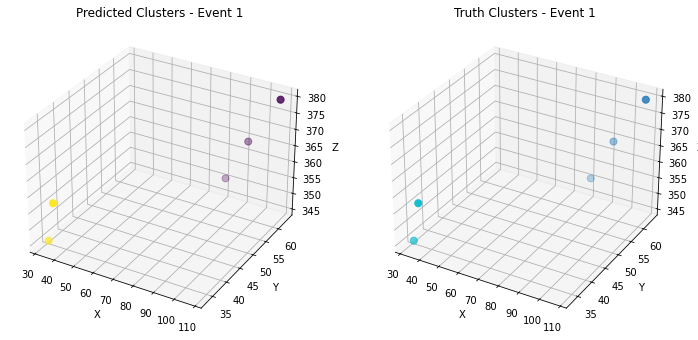

Processing Event 2/3530...


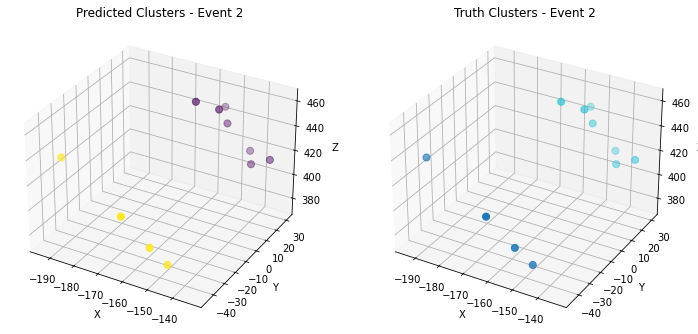

Processing Event 3/3530...


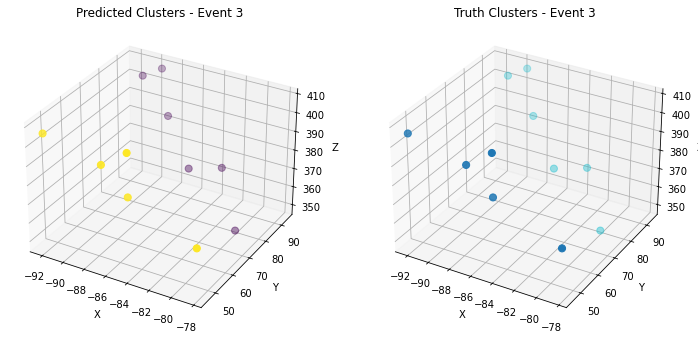

Processing Event 4/3530...


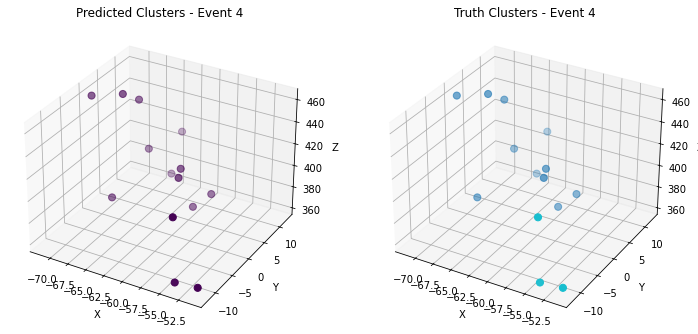

Processing Event 5/3530...


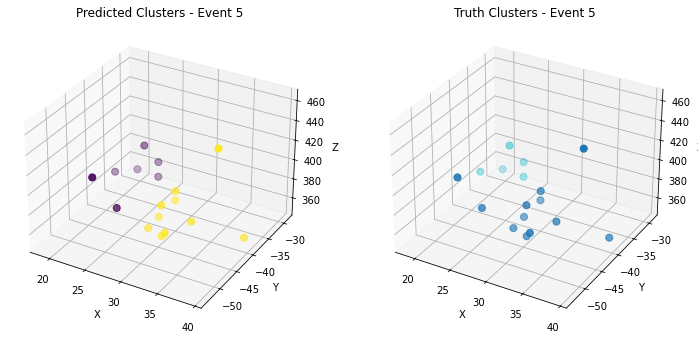

Processing Event 6/3530...


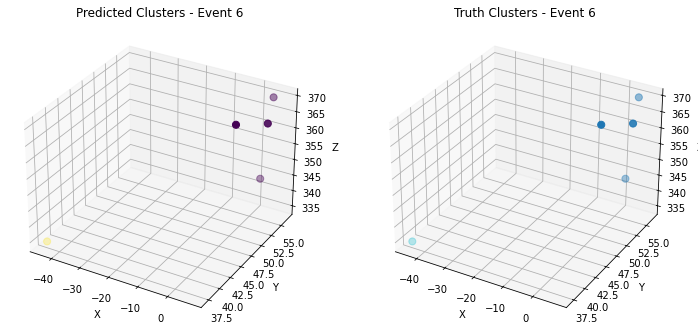

Processing Event 7/3530...


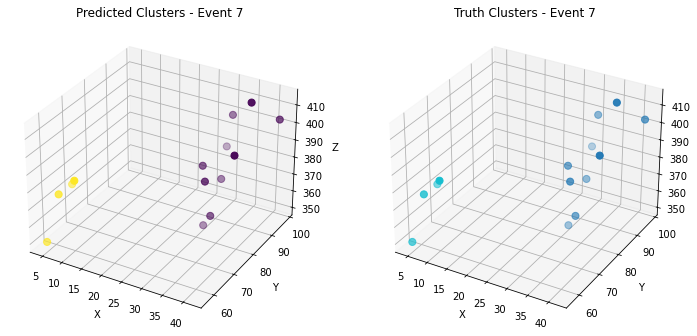

Processing Event 8/3530...


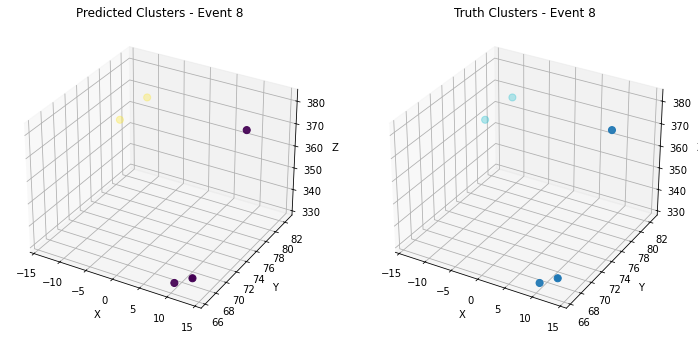

Processing Event 9/3530...


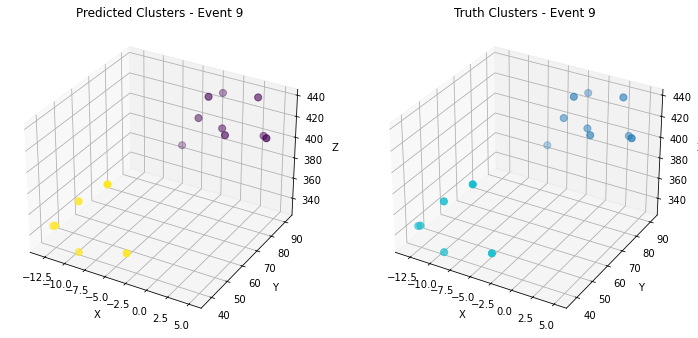

Processing Event 10/3530...


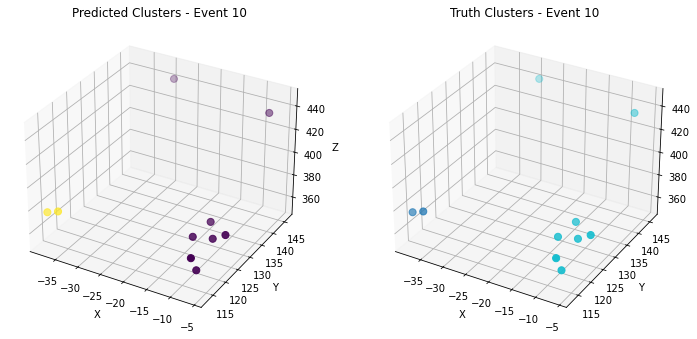

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot clusters
def plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels):
    fig = plt.figure(figsize=(12, 6))  # Set up the figure for side-by-side plots

    # Plot 1: Predicted clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=cluster_labels, cmap='viridis', s=50)
    ax1.set_title(f"Predicted Clusters - Event {event_idx+1}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot 2: Truth clusters
    ax2 = fig.add_subplot(122, projection='3d')
    truth_colors = [label[0] for label in truth_labels]  # Use first entry of SimLabels as the cluster assignment
    ax2.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=truth_colors, cmap='tab10', s=50)
    ax2.set_title(f"Truth Clusters - Event {event_idx+1}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Loop over all events
for event_idx in range(10):
    print(f"Processing Event {event_idx+1}/{len(data_test)}...")

    # Extract data
    xyz_coords = data_test[event_idx].x[:, :3]  # Get x, y, z coordinates
    cluster_labels = all_cluster_labels[event_idx]  # Predicted cluster labels
    truth_labels = data_test[event_idx].assoc  # True SimLabels

    # Convert to numpy if not already
    xyz_coords = xyz_coords.cpu().numpy() if isinstance(xyz_coords, torch.Tensor) else xyz_coords
    cluster_labels = np.array(cluster_labels)
    truth_labels = np.array(truth_labels)

    # Plot for the current event
    plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels)


# Score Calculations

In [8]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.int().numpy() if isinstance(true_labels_event, torch.Tensor) else true_labels_event.astype(int)
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 1.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 1.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 1.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })

# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores.head())

Processing Events: 100%|███████████████████| 3000/3000 [00:10<00:00, 279.14it/s]

   event_index cp_id trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0  None         None                1.0                1.0   
1            1  None         None                1.0                1.0   
2            2  None         None                1.0                1.0   
3            3  None         None                1.0                1.0   
4            4  None         None                1.0                1.0   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation energy_diff_ratio  
0        0.0               0.0         0.0            0.0              None  
1        0.0               0.0         0.0            0.0              None  
2        0.0               0.0         0.0            0.0              None  
3        0.0               0.0         0.0            0.0              None  
4        0.0               0.0         0.0            0.0              None  


In [9]:
import pandas as pd

# Placeholder for data_test (replace with your actual dataset)
# Example structure:
# data_test[i].StR_score -> tensor for SimToReco
# data_test[i].RtS_score -> tensor for RecoToSim

# Simulated data for demonstration
class EventData:
    def __init__(self, StR_score, RtS_score):
        self.StR_score = StR_score
        self.RtS_score = RtS_score

# Initialize an empty list for all event data
data = []

# Loop through each event in data_test
for event_index, event in enumerate(data_test):
    StR_score = event.StR_score  # SimToReco tensor
    RtS_score = event.RtS_score  # RecoToSim tensor
    
    # Determine dimensions
    num_cps = len(StR_score)  # Number of calo particles
    num_tracksters = len(RtS_score)  # Number of tracksters
    
    # Map scores
    for cp_id in range(num_cps):
        for trackster_id in range(num_tracksters):
            # Extract scalar values from tensors if they are tensors
            sim_to_reco_score = (
                StR_score[cp_id][trackster_id].item() 
                if hasattr(StR_score[cp_id][trackster_id], 'item') 
                else StR_score[cp_id][trackster_id]
            )
            reco_to_sim_score = (
                RtS_score[trackster_id][cp_id].item() 
                if hasattr(RtS_score[trackster_id][cp_id], 'item') 
                else RtS_score[trackster_id][cp_id]
            )
            
            # Append row to data list
            data.append({
                'event_index': event_index,
                'cp_id': cp_id,
                'trackster_id': trackster_id,
                'sim_to_reco_score': sim_to_reco_score,
                'reco_to_sim_score': reco_to_sim_score
            })

# Create DataFrame
df_CERN = pd.DataFrame(data)

# Display the resulting DataFrame
print(df_CERN)

       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score
0                0      0             0           0.202020       5.831018e-07
1                0      0             1           1.000000       4.605221e-05
2                0      0             2           1.000000       0.000000e+00
3                0      1             0           0.518250       1.000000e+00
4                0      1             1           0.971559       1.000000e+00
...            ...    ...           ...                ...                ...
25125         3529      0             1           1.000000       0.000000e+00
25126         3529      0             2           1.000000       0.000000e+00
25127         3529      1             0           0.011682       1.000000e+00
25128         3529      1             1           0.999408       1.000000e+00
25129         3529      1             2           1.000000       1.000000e+00

[25130 rows x 5 columns]


# Purity + Efficiency

In [10]:
import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency and purity
def calculate_efficiency_purity(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    return cp_valid, tst_valid
# Calculate for both models
cp_valid, tst_valid = calculate_efficiency_purity(df_scores, "Your Model")

calculate_efficiency_purity(df_CERN, "CERN Model")



Model: Your Model
Efficiency: 0.9663 (6652 associated CPs out of 6884 total CPs)
Purity: 0.9413 (6594 associated Tracksters out of 7005 total Tracksters)

Model: CERN Model
Efficiency: 0.3339 (2352 associated CPs out of 7044 total CPs)
Purity: 0.9930 (12477 associated Tracksters out of 12565 total Tracksters)


(       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score
 0                0      0             0           0.202020       5.831018e-07
 1                0      0             1           1.000000       4.605221e-05
 2                0      0             2           1.000000       0.000000e+00
 3                0      1             0           0.518250       1.000000e+00
 4                0      1             1           0.971559       1.000000e+00
 ...            ...    ...           ...                ...                ...
 25125         3529      0             1           1.000000       0.000000e+00
 25126         3529      0             2           1.000000       0.000000e+00
 25127         3529      1             0           0.011682       1.000000e+00
 25128         3529      1             1           0.999408       1.000000e+00
 25129         3529      1             2           1.000000       1.000000e+00
 
 [25130 rows x 5 columns],
        event_index  cp

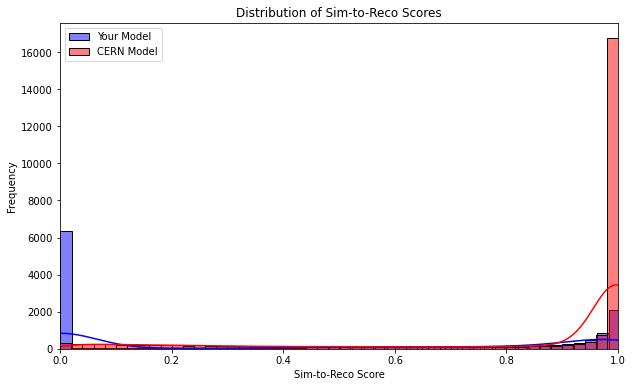

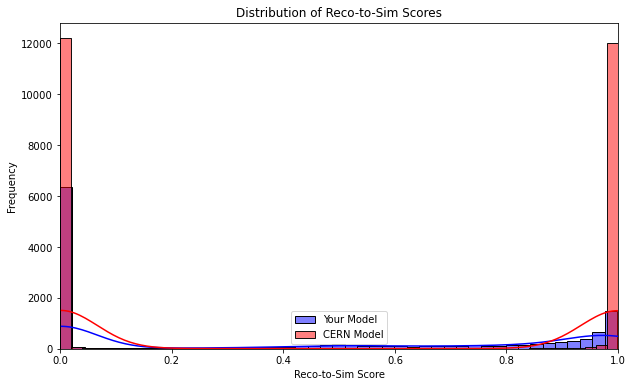

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Plotting Sim-to-Reco Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(cp_valid['sim_to_reco_score'], bins=50, kde=True, label='Your Model', color='blue')
sns.histplot(df_CERN['sim_to_reco_score'], bins=50, kde=True, label='CERN Model', color='red')
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')
plt.xlim(0,1)
plt.legend()
plt.show()

# ----- Plotting Reco-to-Sim Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(tst_valid['reco_to_sim_score'], bins=50, kde=True, label='Your Model', color='blue')
sns.histplot(df_CERN['reco_to_sim_score'], bins=50, kde=True, label='CERN Model', color='red')
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')
plt.xlim(0,1)
plt.legend()
plt.show()


# Plot vs params

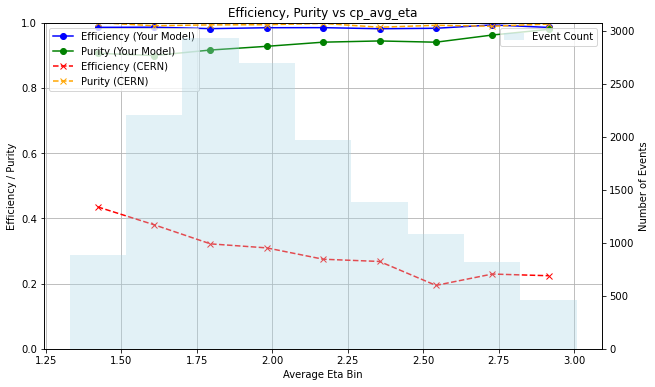

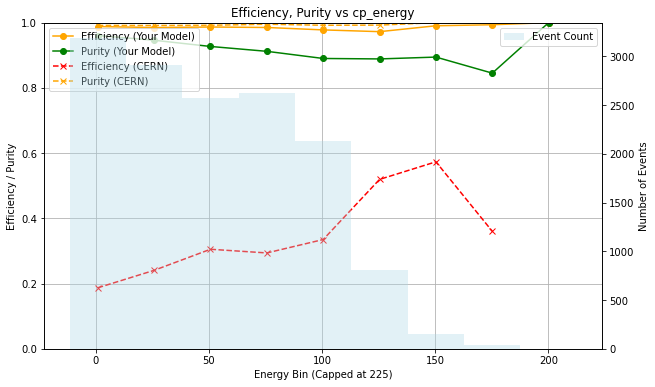

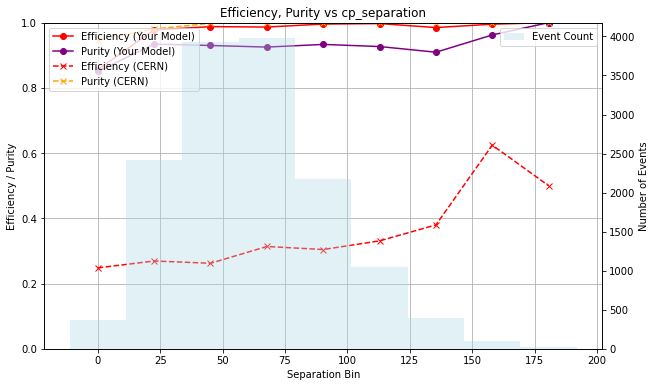

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Preprocessing ----
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Map Required Columns from df_scores to df_CERN
event_mapping = df_scores[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation']].drop_duplicates('event_index')
df_CERN = pd.merge(df_CERN, event_mapping, on='event_index', how='left')

# ---- Efficiency and Purity Calculation ----
def calculate_efficiency_purity(df):
    # Efficiency
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
    cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

    # Purity
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
    tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

    # Merge into a single DataFrame
    df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                       tst_valid[['event_index', 'purity']],
                       on='event_index',
                       how='inner')
    return df_plot

df_plot = calculate_efficiency_purity(df_scores)
df_plot_CERN = calculate_efficiency_purity(df_CERN)

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 10)
energy_bins = np.linspace(df_plot['cp_energy'].min(), 225, 10)  # Capped at 225
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 10)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

df_plot_CERN['eta_bin'] = pd.cut(df_plot_CERN['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot_CERN['energy_bin'] = pd.cut(df_plot_CERN['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot_CERN['separation_bin'] = pd.cut(df_plot_CERN['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate Data
eta_group = aggregate_bins(df_plot, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group = aggregate_bins(df_plot, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group = aggregate_bins(df_plot, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

eta_group_CERN = aggregate_bins(df_plot_CERN, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group_CERN = aggregate_bins(df_plot_CERN, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group_CERN = aggregate_bins(df_plot_CERN, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

# Fill Missing Values
for group in [eta_group_CERN, energy_group_CERN, separation_group_CERN]:
    group.fillna({'efficiency_mean': np.nan, 'efficiency_error': np.nan,
                  'purity_mean': np.nan, 'purity_error': np.nan, 'count': 0}, inplace=True)

# ---- Plotting ----
def plot_metric(x_bins, group, group_CERN, xlabel, ylabel, title, efficiency_color, purity_color):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Your Model
    ax1.plot(x_bins, group['efficiency_mean'], marker='o', linestyle='-', color=efficiency_color, label='Efficiency (Your Model)')
    ax1.plot(x_bins, group['purity_mean'], marker='o', linestyle='-', color=purity_color, label='Purity (Your Model)')

    # CERN Model
    ax1.plot(x_bins, group_CERN['efficiency_mean'], marker='x', linestyle='--', color='red', label='Efficiency (CERN)')
    ax1.plot(x_bins, group_CERN['purity_mean'], marker='x', linestyle='--', color='orange', label='Purity (CERN)')

    ax1.set_ylim(0, 1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2.bar(x_bins, group['count'], width=(x_bins[1] - x_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
    ax2.set_ylabel('Number of Events')
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()

# Plot Each Metric
plot_metric(eta_bins[:-1], eta_group, eta_group_CERN, 'Average Eta Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_avg_eta', 'blue', 'green')
plot_metric(energy_bins[:-1], energy_group, energy_group_CERN, 'Energy Bin (Capped at 225)', 'Efficiency / Purity', 'Efficiency, Purity vs cp_energy', 'orange', 'green')
plot_metric(separation_bins[:-1], separation_group, separation_group_CERN, 'Separation Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_separation', 'red', 'purple')


# Plotting Sigma

/tmp/ipykernel_2991351/1461127319.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


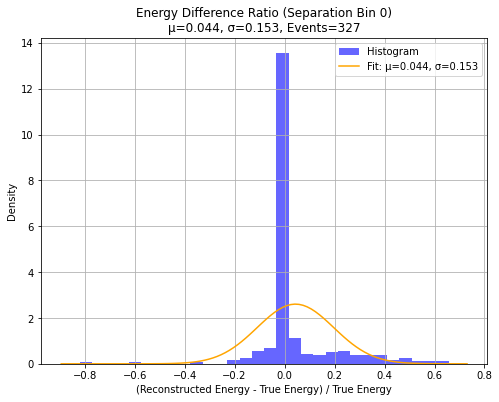

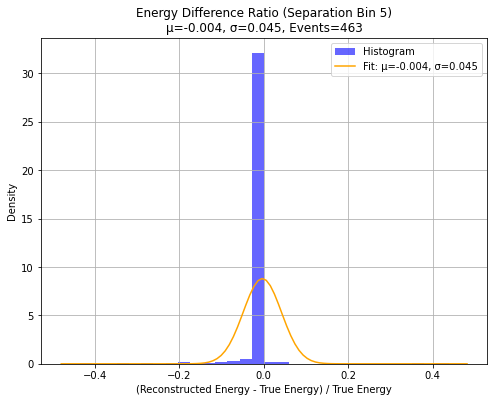

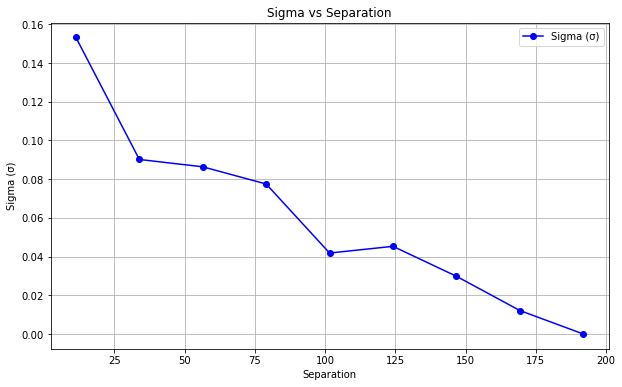

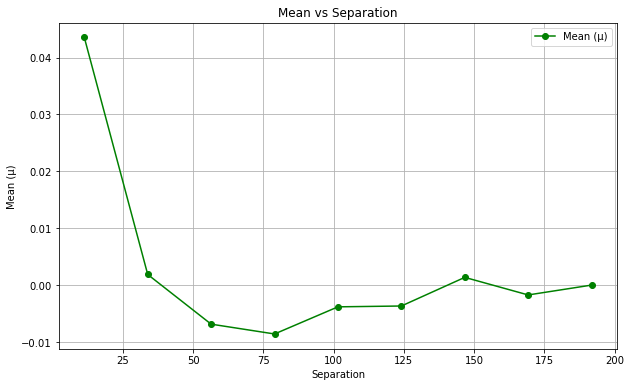

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


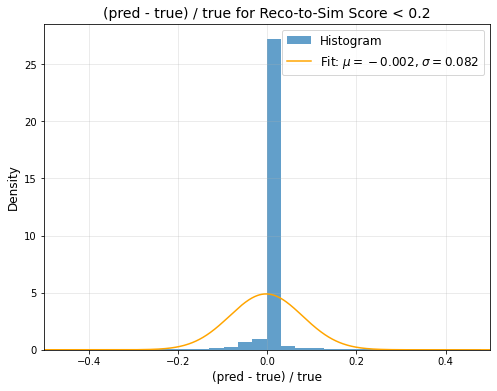

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlim(-0.5, 0.5)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


/tmp/ipykernel_2991351/776054542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)


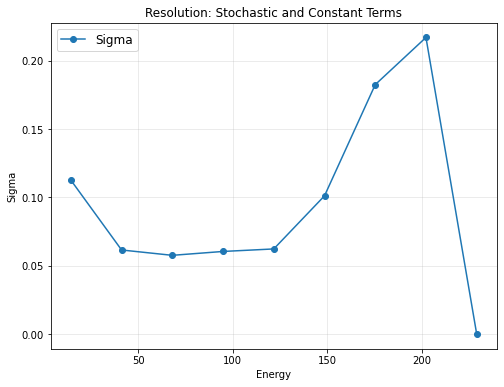

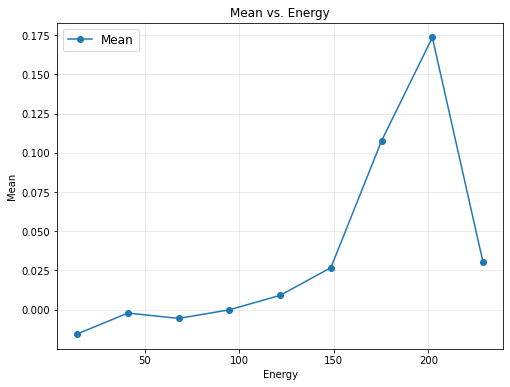

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 10)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# ROC curve

In [16]:
print()

In [17]:
from itertools import combinations
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)


# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for threshold in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by separation threshold
    valid_events = df_scores[df_scores['cp_separation'] <= threshold]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Extract event data
            event = data_test[event_idx]
            true_labels_event = event.assoc[:, 0]  # Ground truth cluster labels
            pred_trackster_labels = np.array(all_cluster_labels[event_idx])  # Predicted labels

            # Generate all possible pairs of tracksters
            trackster_pairs = list(combinations(range(len(true_labels_event)), 2))

            # Initialize sets
            P_V = set()  # Ground truth pairs
            P_U = set()  # Predicted pairs
            P_X = set(trackster_pairs)  # All pairs

            for i, j in trackster_pairs:
                if true_labels_event[i] == true_labels_event[j]:
                    P_V.add((i, j))  # Ground truth edge
                if pred_trackster_labels[i] == pred_trackster_labels[j]:
                    P_U.add((i, j))  # Predicted edge

            # Calculate Confusion Matrix
            TP = len(P_V & P_U)  # True Positive
            FN = len(P_V - P_U)  # False Negative
            FP = len(P_U - P_V)  # False Positive
            TN = len(P_X - (P_V | P_U))  # True Negative

            # Update global counts
            global_TP += TP
            global_FP += FP
            global_FN += FN
            global_TN += TN

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)
    
# Check conditions for removing the first point
if len(fpr_list) > 1 and len(tpr_list) > 1:
    if (fpr_list[1] > fpr_list[0]) or (tpr_list[1] <= tpr_list[0]):
        print("Removing the first point from fpr_list and tpr_list due to conditions.")
        fpr_list.pop(0)
        tpr_list.pop(0)
        




# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using cp_separation as Threshold')
plt.legend(loc="lower right")
plt.show()


Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing

ValueError: x is neither increasing nor decreasing : [0.92152466 0.7060274  0.46134957 0.28229827 0.21070728 0.16558259
 0.13679206 0.11898804 0.10477625 0.09732402 0.09304257 0.09079063
 0.08890369 0.08764328 0.08709517 0.08745931 0.08729148 0.08722602
 0.08718464 0.08718051 0.08717885].

In [ ]:
fpr_list.sort()
tpr_list.sort()

# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using cp_separation as Threshold')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define separation thresholds (e.g., 0, 5, 10, ..., max separation in dataset)
separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)
score_threshold = 0.2  # Fixed threshold for both scores

# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for separation in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by cp_separation threshold
    valid_events = df_CERN[df_CERN['cp_separation'] <= separation]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Filter pairs for this event
            event_pairs = df_CERN[df_CERN['event_index'] == event_idx]
            
            # Extract scores
            sim_to_reco_scores = event_pairs['sim_to_reco_score'].values
            reco_to_sim_scores = event_pairs['reco_to_sim_score'].values

            # Loop through each pair
            for sim_score, reco_score in zip(sim_to_reco_scores, reco_to_sim_scores):
                if sim_score < score_threshold and reco_score < score_threshold:
                    global_TP += 1  # True Positive
                elif reco_score < score_threshold and sim_score > score_threshold:
                    global_FP += 1  # False Positive
                elif sim_score < score_threshold and reco_score > score_threshold:
                    global_FN += 1  # False Negative
                elif sim_score > score_threshold and reco_score > score_threshold:
                    global_TN += 1  # True Negative

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current separation threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)

# Pair FPR and TPR together
roc_points = list(zip(fpr_list, tpr_list))

# Sort by FPR in descending order
roc_points.sort(key=lambda x: x[0], reverse=True)

# Remove non-monotonic points
filtered_points = []
prev_fpr = float('inf')  # Start with a very large value for FPR

for fpr, tpr in roc_points:
    if fpr <= prev_fpr:
        filtered_points.append((fpr, tpr))
        prev_fpr = fpr

# Unzip into FPR and TPR lists
fpr_list, tpr_list = zip(*filtered_points)

# Convert back to lists
fpr_list = list(fpr_list)
tpr_list = list(tpr_list)

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)



# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using Fixed Threshold (0.2) and Varying Separation')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(fpr_list)

In [ ]:
print(tpr_list)

In [ ]:

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)

In [ ]:
print(tpr_list)

# Test

In [80]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Define a simple Event class
class Event:
    def __init__(self, x, assoc):
        self.x = x  # Tensor or numpy array
        self.assoc = assoc  # Tensor or numpy array


In [81]:
# Define particles as per the numerical example
# Columns: x, y, z, energy, eta
# Particle 0: (0,0,0), 10, 1.0, cp=0, tst=0
# Particle 1: (1,0,0), 20, 1.1, cp=0, tst=0
# Particle 2: (0,1,0), 30, 2.0, cp=1, tst=1
# Particle 3: (1,1,0), 40, 2.1, cp=1, tst=1

# Create x: shape (num_particles, 5)
x = np.array([
    [0, 0, 0, 10, 1.0],
    [1, 0, 0, 20, 1.1],
    [0, 1, 0, 30, 2.0],
    [1, 1, 0, 40, 2.1],
])

# Create assoc: shape (num_particles, 1)
assoc = np.array([
    [0],
    [0],
    [1],
    [1],
])

# Create a single event
event = Event(x=x, assoc=assoc)

# data_test contains one event
data_test = [event]

# Define all_cluster_labels: list of lists, one per event
# For event 0: Trackster 0 contains particles 0 and 1, Trackster 1 contains 2 and 3
all_cluster_labels = [
    [0, 0, 1, 1]
]


In [82]:
# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.astype(int) if isinstance(true_labels_event, np.ndarray) else true_labels_event.int().numpy()
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    # Append to all_scores
                    all_scores.append({
                        'event_index': event_idx,
                        'cp_id': cp,
                        'trackster_id': tst,
                        'sim_to_reco_score': 0.0,
                        'reco_to_sim_score': 1.0,
                        'cp_energy': cp_total_energy[cp],
                        'trackster_energy': tst_total_energy[tst],
                        'cp_avg_eta': cp_avg_eta[cp],
                        'cp_separation': cp_separation,
                        'energy_diff_ratio': (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]
                    })
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })


Processing Events: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1618.17it/s]


In [83]:
# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores)


   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0      0             0             0.0000             0.0000   
1            0      0             1             0.6800             0.5392   
2            0      1             0             0.5392             0.6800   
3            0      1             1             0.0000             0.0000   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0       30.0              30.0        1.05            1.0           0.000000  
1       30.0              70.0        1.05            1.0           1.333333  
2       70.0              30.0        2.05            1.0          -0.571429  
3       70.0              70.0        2.05            1.0           0.000000  


In [84]:
print('yay')

yay


# Check other data

In [85]:
import uproot

In [86]:
file = uproot.open('/vols/cms/bmaier/hgcal/data/20230701_multi_particles/test/raw/particles_10_8373759_ntuple.root')

In [88]:
print(file.keys())

['ticlNtuplizer;1', 'ticlNtuplizer/tracksters;1', 'ticlNtuplizer/clusters;1', 'ticlNtuplizer/graph;1', 'ticlNtuplizer/candidates;1', 'ticlNtuplizer/trackstersMerged;1', 'ticlNtuplizer/associations;1', 'ticlNtuplizer/simtrackstersSC;1', 'ticlNtuplizer/simtrackstersCP;1', 'ticlNtuplizer/tracks;1']


In [89]:
track = file['ticlNtuplizer/tracksters;1']

In [90]:
print(track.keys())

['event', 'NClusters', 'NTracksters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'trackster_barycenter_eta', 'trackster_barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_time', 'vertices_timeErr', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity', 'layer_cluster_seed']


In [92]:
v_x = track['barycenter_x'].array()

In [97]:
print(len(v_x[0]))

31
